In [1]:
import numpy as np

In [3]:
weights = np.random.rand(35, 35, 784)

In [20]:
weights.shape

(35, 35, 784)

In [9]:
x_indices, y_indices = np.meshgrid(np.arange(35), np.arange(35), indexing='ij')


In [25]:
np.meshgrid(np.arange(35), np.arange(35), indexing='ij')



[array([[ 0,  0,  0, ...,  0,  0,  0],
        [ 1,  1,  1, ...,  1,  1,  1],
        [ 2,  2,  2, ...,  2,  2,  2],
        ...,
        [32, 32, 32, ..., 32, 32, 32],
        [33, 33, 33, ..., 33, 33, 33],
        [34, 34, 34, ..., 34, 34, 34]]),
 array([[ 0,  1,  2, ..., 32, 33, 34],
        [ 0,  1,  2, ..., 32, 33, 34],
        [ 0,  1,  2, ..., 32, 33, 34],
        ...,
        [ 0,  1,  2, ..., 32, 33, 34],
        [ 0,  1,  2, ..., 32, 33, 34],
        [ 0,  1,  2, ..., 32, 33, 34]])]

In [27]:
#mix x_indices and y_indices
np.stack([x_indices, y_indices], axis=-1)

array([[[ 0,  0],
        [ 0,  1],
        [ 0,  2],
        ...,
        [ 0, 32],
        [ 0, 33],
        [ 0, 34]],

       [[ 1,  0],
        [ 1,  1],
        [ 1,  2],
        ...,
        [ 1, 32],
        [ 1, 33],
        [ 1, 34]],

       [[ 2,  0],
        [ 2,  1],
        [ 2,  2],
        ...,
        [ 2, 32],
        [ 2, 33],
        [ 2, 34]],

       ...,

       [[32,  0],
        [32,  1],
        [32,  2],
        ...,
        [32, 32],
        [32, 33],
        [32, 34]],

       [[33,  0],
        [33,  1],
        [33,  2],
        ...,
        [33, 32],
        [33, 33],
        [33, 34]],

       [[34,  0],
        [34,  1],
        [34,  2],
        ...,
        [34, 32],
        [34, 33],
        [34, 34]]])

In [24]:
distances = np.linalg.norm(weights - 784, axis=-1)
med = np.unravel_index(np.argmin(distances), distances.shape)

In [22]:
med

(31, 4)

In [14]:
distances = np.sqrt((x_indices - med[0]) ** 2 + (y_indices - med[1]) ** 2)

influences = np.exp(-np.power(distances, 2) / 2 * 0.5)

In [19]:
influences.shape

(35, 35)

In [16]:
distances

array([[31.25699922, 31.144823  , 31.06444913, ..., 41.77319715,
        42.44997055, 43.13930922],
       [30.2654919 , 30.14962686, 30.06659276, ..., 41.03656906,
        41.72529209, 42.42640687],
       [29.27456234, 29.15475947, 29.06888371, ..., 40.31128874,
        41.01219331, 41.72529209],
       ...,
       [ 4.12310563,  3.16227766,  2.23606798, ..., 28.01785145,
        29.01723626, 30.01666204],
       [ 4.47213595,  3.60555128,  2.82842712, ..., 28.0713377 ,
        29.06888371, 30.06659276],
       [ 5.        ,  4.24264069,  3.60555128, ..., 28.16025568,
        29.15475947, 30.14962686]])

In [18]:
influences[:, :, np.newaxis].shape

(35, 35, 1)

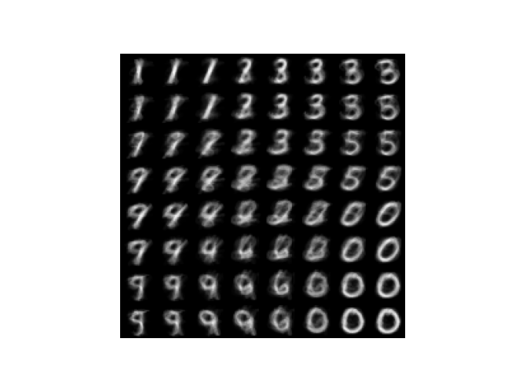

In [42]:
import os
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from PIL import Image
from IPython.display import HTML

# Directory containing the PNG files
image_dir = 'src/Self_Organizing_Maps/images'

# List of image file paths
image_files = [os.path.join(image_dir, file) for file in sorted(os.listdir(image_dir)) if file.endswith('.png')]

# Load the images into a list
images = [Image.open(image_file) for image_file in image_files]

# Create a figure
fig, ax = plt.subplots()

# Hide the axes
ax.axis('off')

# Initialize the plot with the first image
im = ax.imshow(images[0])

# Update function for the animation
def update(frame):
    im.set_array(images[frame])
    return [im]

# Create the animation and assign it to a variable
ani = animation.FuncAnimation(fig, update, frames=len(images), interval=1000, repeat=True)

# Display the animation in the notebook
HTML(ani.to_jshtml())